In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [2]:
df.shape

(6607, 20)

In [3]:
df.dtypes


Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [4]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [5]:
df.isnull().sum()


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [7]:
df.duplicated().sum()


0

In [8]:
df[df.isnull().any(axis=1)]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
33,14,60,High,Medium,No,5,50,Medium,Yes,2,Medium,Medium,Public,Neutral,3,No,College,NaN,Female,61
127,17,97,Medium,Medium,No,8,89,Medium,Yes,1,Low,NaN,Public,Neutral,4,No,High School,Far,Male,69
240,15,87,Low,Medium,No,4,54,Medium,Yes,1,Medium,Medium,Public,Neutral,6,No,NaN,Moderate,Male,65
275,23,82,Low,Medium,Yes,8,94,Medium,Yes,1,Medium,Medium,Public,Negative,2,Yes,High School,NaN,Male,66
316,24,90,Low,Low,No,7,83,Medium,Yes,0,Low,Medium,Private,Positive,3,No,College,NaN,Male,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,23,64,Medium,Medium,No,7,75,Medium,Yes,2,Medium,High,Public,Positive,2,No,NaN,Near,Female,66
6579,9,84,Medium,Medium,No,6,74,Medium,Yes,5,High,NaN,Public,Neutral,2,No,High School,Near,Male,67
6589,22,90,Low,High,No,5,99,Medium,Yes,1,Low,Low,Private,Positive,2,No,College,NaN,Female,70
6594,9,90,High,High,Yes,7,79,Low,Yes,4,High,High,Public,Positive,4,No,High School,NaN,Male,70


In [11]:
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0]) 
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0]) 
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0]) 

In [12]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [13]:
df = df[(df['Exam_Score'] >= 0) & (df['Exam_Score'] <= 100)]

In [14]:
df['Parental_Involvement'].value_counts()


Parental_Involvement
Medium    3362
High      1908
Low       1336
Name: count, dtype: int64

In [15]:
df['Access_to_Resources'].value_counts()


Access_to_Resources
Medium    3318
High      1975
Low       1313
Name: count, dtype: int64

In [16]:
df['Extracurricular_Activities'].value_counts()


Extracurricular_Activities
Yes    3937
No     2669
Name: count, dtype: int64

In [17]:
df['Motivation_Level'].value_counts()


Motivation_Level
Medium    3351
Low       1936
High      1319
Name: count, dtype: int64

In [18]:
df['Internet_Access'].value_counts()


Internet_Access
Yes    6108
No      498
Name: count, dtype: int64

In [19]:
df['Family_Income'].value_counts()


Family_Income
Low       2672
Medium    2666
High      1268
Name: count, dtype: int64

In [20]:
df['Teacher_Quality'].value_counts()


Teacher_Quality
Medium    4003
High      1946
Low        657
Name: count, dtype: int64

In [21]:
df['School_Type'].value_counts()


School_Type
Public     4597
Private    2009
Name: count, dtype: int64

In [22]:
df['Peer_Influence'].value_counts()


Peer_Influence
Positive    2637
Neutral     2592
Negative    1377
Name: count, dtype: int64

In [23]:
df['Learning_Disabilities'].value_counts()


Learning_Disabilities
No     5911
Yes     695
Name: count, dtype: int64

In [24]:
df['Parental_Education_Level'].value_counts()


Parental_Education_Level
High School     3312
College         1989
Postgraduate    1305
Name: count, dtype: int64

In [25]:
df['Distance_from_Home'].value_counts()


Distance_from_Home
Near        3951
Moderate    1997
Far          658
Name: count, dtype: int64

In [26]:
df['Gender'].value_counts()


Gender
Male      3814
Female    2792
Name: count, dtype: int64

In [27]:
df['Parental_Involvement'] = df['Parental_Involvement'].map({'Low': 1, 'Medium': 2 , 'High' :3})
df['Access_to_Resources'] = df['Access_to_Resources'].map({'Low': 1, 'Medium': 2 , 'High' :3})
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})
df['Motivation_Level'] = df['Motivation_Level'].map({'Low': 1, 'Medium': 2 , 'High' :3})
df['Internet_Access'] = df['Internet_Access'].map({'Yes': 1, 'No': 0})
df['Family_Income'] = df['Family_Income'].map({'Low': 1, 'Medium': 2 , 'High' :3})
df['Teacher_Quality'] = df['Teacher_Quality'].map({'Low': 1, 'Medium': 2 , 'High' :3})
df['School_Type'] = df['School_Type'].map({'Public': 1, 'Private': 2})
df['Peer_Influence'] = df['Peer_Influence'].map({'Positive': 1, 'Neutral': 2, 'Negative' : 3})
df['Learning_Disabilities'] = df['Learning_Disabilities'].map({'Yes': 1, 'No': 0})
df['Parental_Education_Level'] = df['Parental_Education_Level'].map({'High School': 1, 'College': 2, 'Postgraduate' : 3})
df['Distance_from_Home'] = df['Distance_from_Home'].map({'Near': 1, 'Moderate': 2 , 'Far' :3})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})

In [28]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,0,7,73,1,1,0,1,2,1,1,3,0,1,1,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,3,4,0,2,2,2,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,2,4,0,3,1,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,3,4,0,1,2,1,71
4,19,92,2,2,1,6,65,2,1,3,2,3,1,2,4,0,2,1,2,70


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(df.iloc[:, :-1].values)
y_scaled = scaler_y.fit_transform(df.iloc[:, -1].values.reshape(-1,1)).ravel()

poly = PolynomialFeatures(degree=2, include_bias=False)  # degree=2 for quadratic terms
X_poly = poly.fit_transform(X_scaled)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(
    X_poly, #All columns except last one (exam score)
    y_scaled, #Exam score column
    test_size = 0.2,
    random_state = 0
)
regr = LinearRegression()
regr.fit(X_train_poly, y_train)

LinearRegression()

In [30]:
y_pred_lr = regr.predict(X_test_poly)
y_pred_lr

array([0.2924393 , 0.24952014, 0.28333743, ..., 0.29663928, 0.28233989,
       0.09008106])

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, #All columns except last one (exam score)
    y_scaled, #Exam score column
    test_size = 0.2,
    random_state = 0
)
dt_regressor = DecisionTreeRegressor(max_depth=3, min_samples_leaf=2)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=2)

In [32]:
y_pred_dt = dt_regressor.predict(X_test)
y_pred_dt

array([0.32728481, 0.22922761, 0.22922761, ..., 0.32728481, 0.29651416,
       0.17864049])

In [33]:
X_test.shape


(1322, 19)

array([[<Axes: title={'center': 'Hours_Studied'}>,
        <Axes: title={'center': 'Attendance'}>,
        <Axes: title={'center': 'Parental_Involvement'}>,
        <Axes: title={'center': 'Access_to_Resources'}>],
       [<Axes: title={'center': 'Extracurricular_Activities'}>,
        <Axes: title={'center': 'Sleep_Hours'}>,
        <Axes: title={'center': 'Previous_Scores'}>,
        <Axes: title={'center': 'Motivation_Level'}>],
       [<Axes: title={'center': 'Internet_Access'}>,
        <Axes: title={'center': 'Tutoring_Sessions'}>,
        <Axes: title={'center': 'Family_Income'}>,
        <Axes: title={'center': 'Teacher_Quality'}>],
       [<Axes: title={'center': 'School_Type'}>,
        <Axes: title={'center': 'Peer_Influence'}>,
        <Axes: title={'center': 'Physical_Activity'}>,
        <Axes: title={'center': 'Learning_Disabilities'}>],
       [<Axes: title={'center': 'Parental_Education_Level'}>,
        <Axes: title={'center': 'Distance_from_Home'}>,
        <Axes: ti

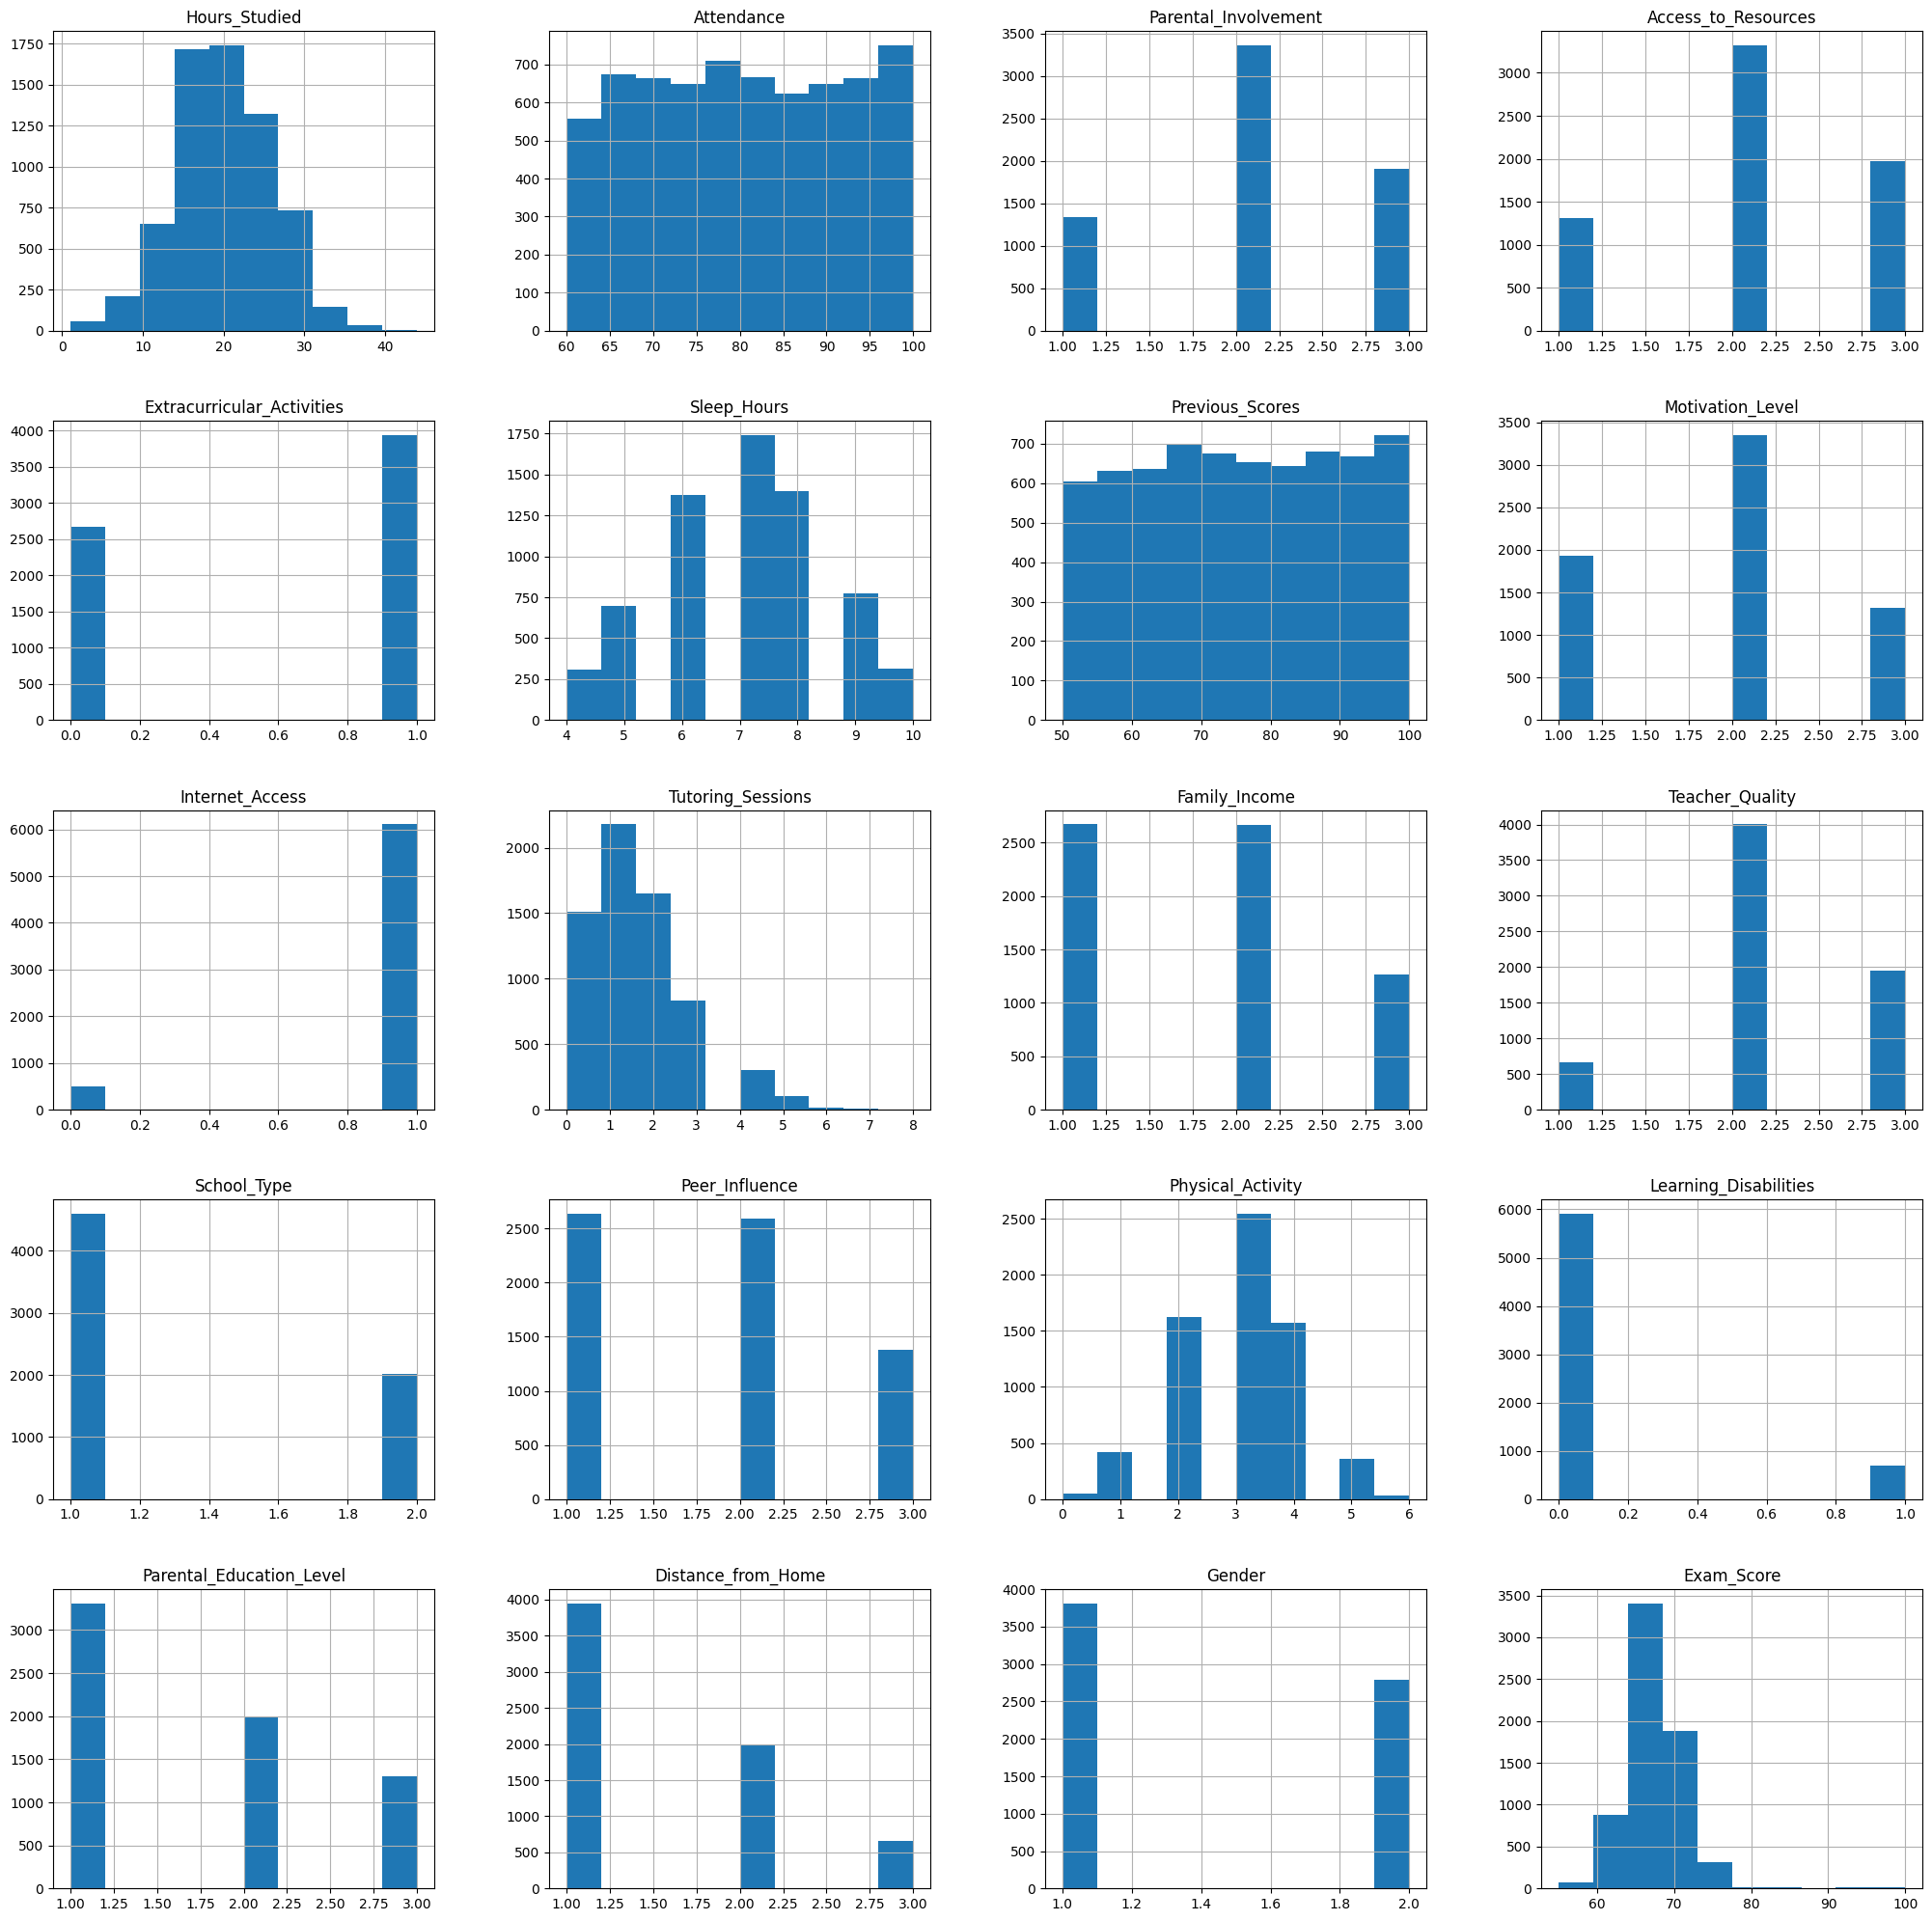

In [34]:
df.hist(figsize=(25,25))


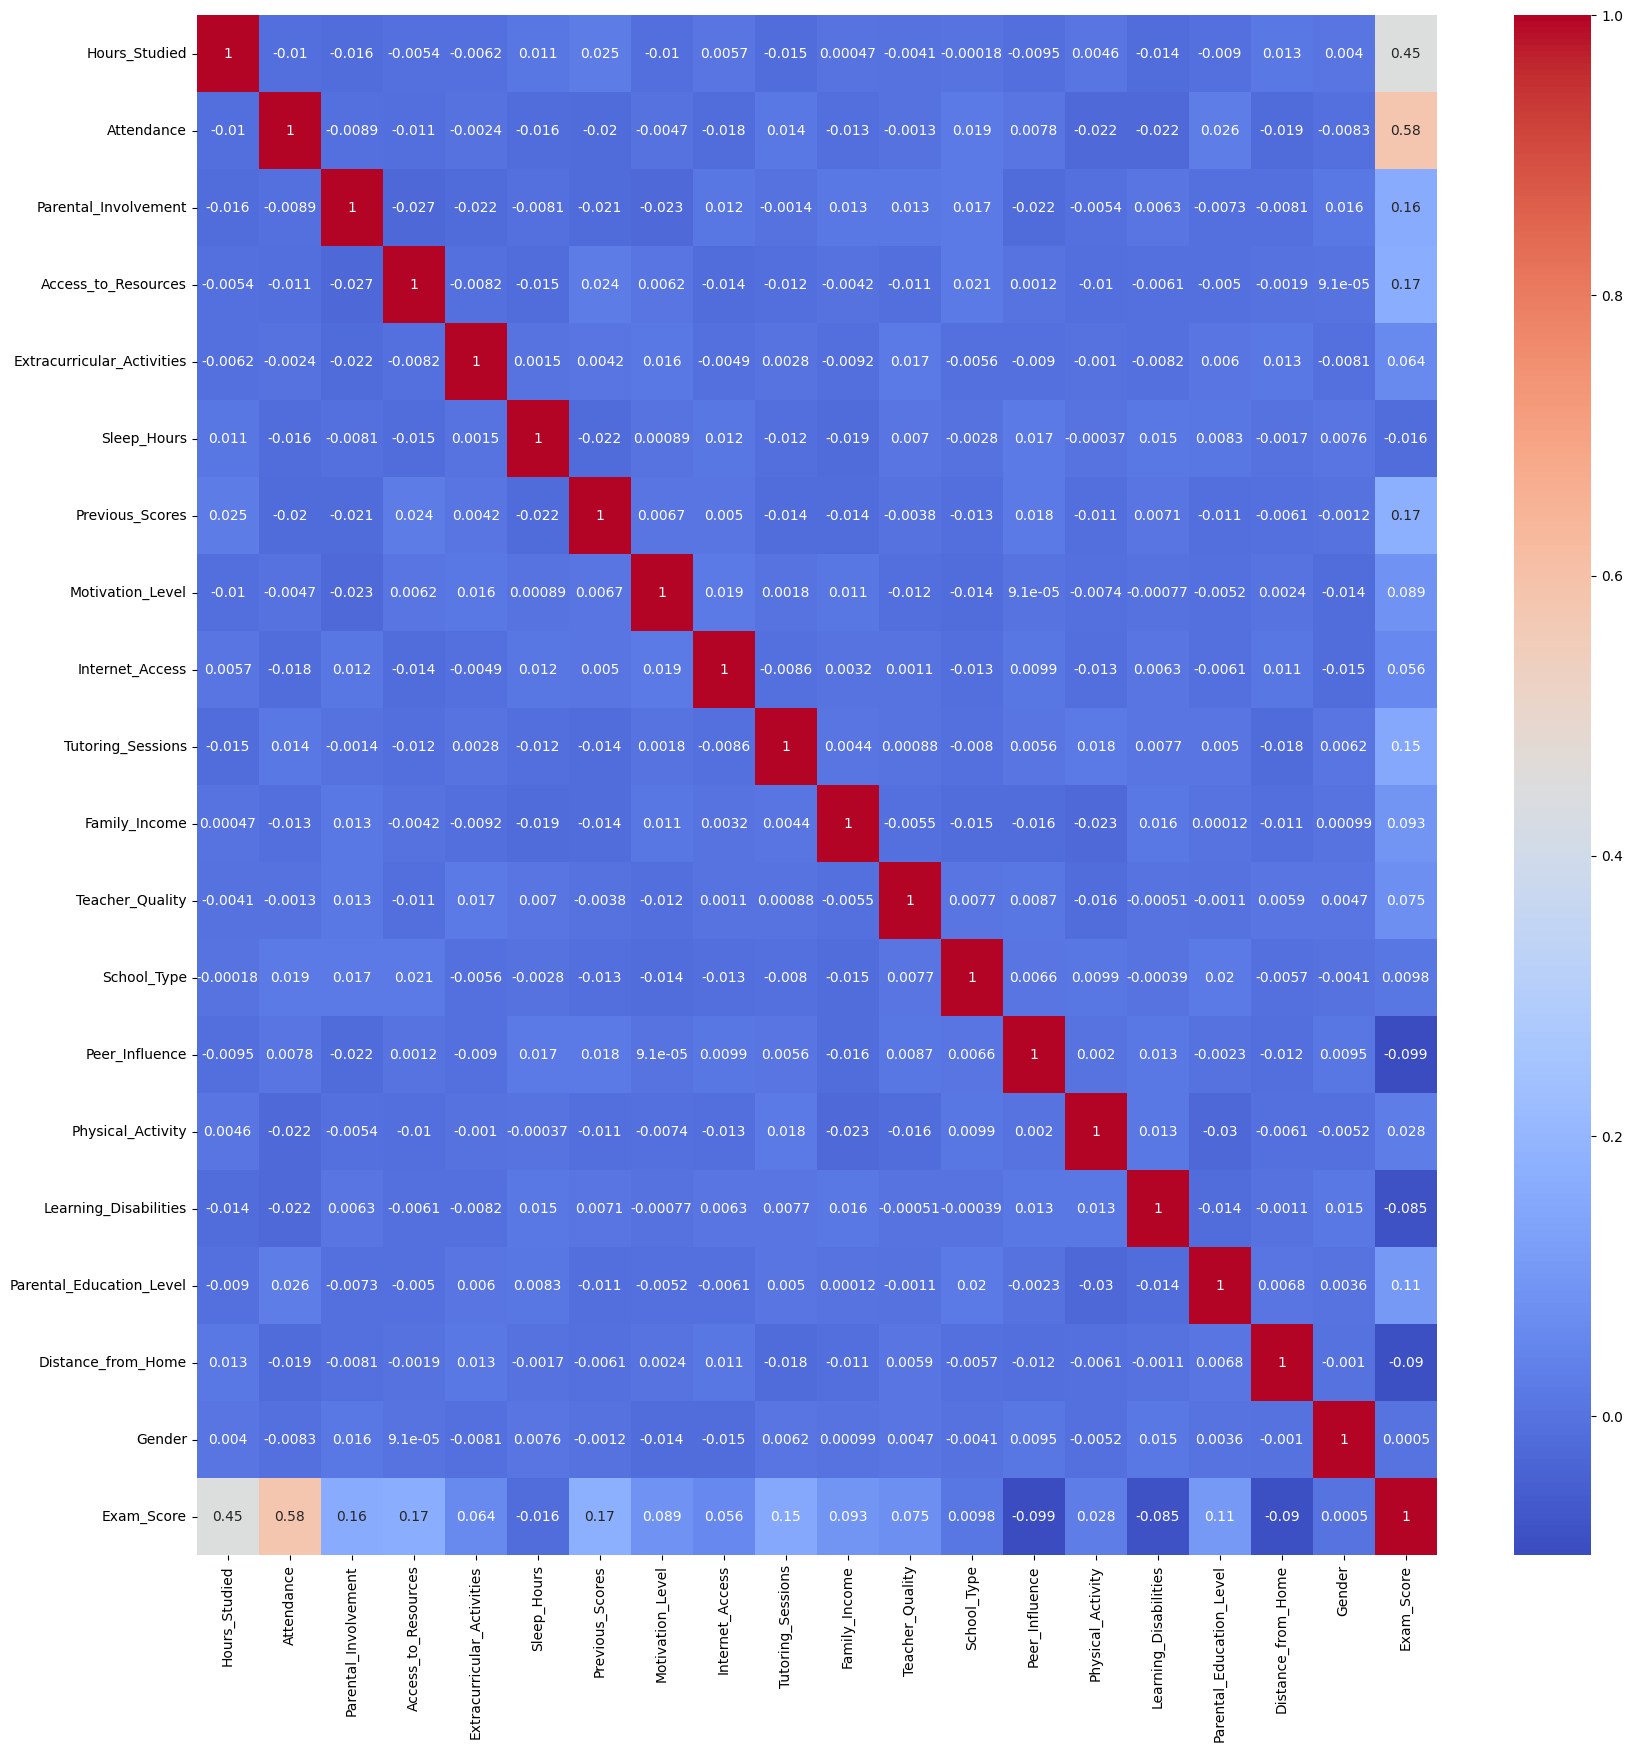

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr(),cmap='coolwarm', annot=True)
plt.show()

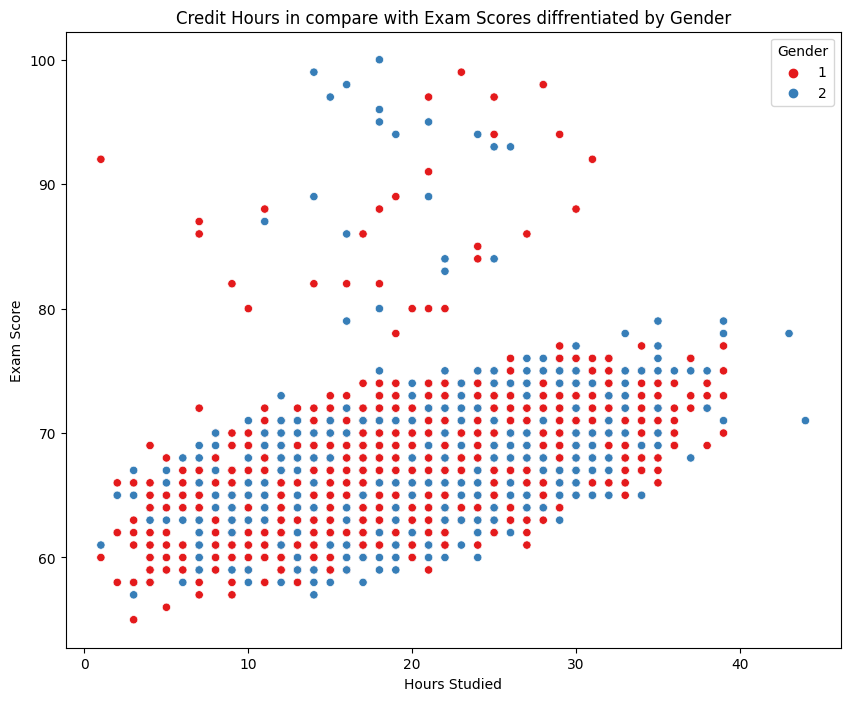

In [36]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x='Hours_Studied',y='Exam_Score',hue='Gender',palette='Set1')
plt.title('Credit Hours in compare with Exam Scores diffrentiated by Gender')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

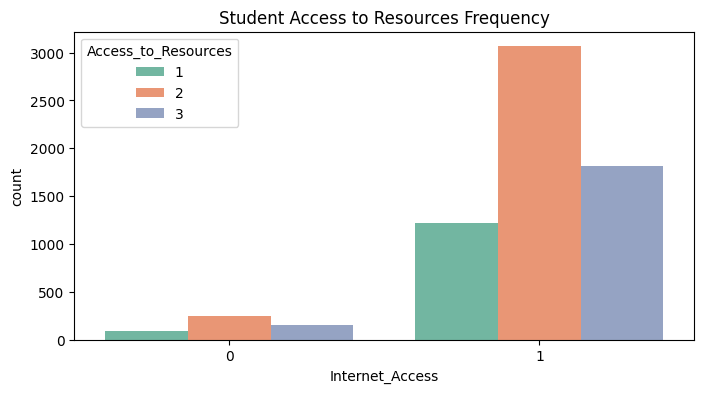

In [37]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Internet_Access'], hue=df['Access_to_Resources'], palette='Set2')
plt.title('Student Access to Resources Frequency')
plt.show()

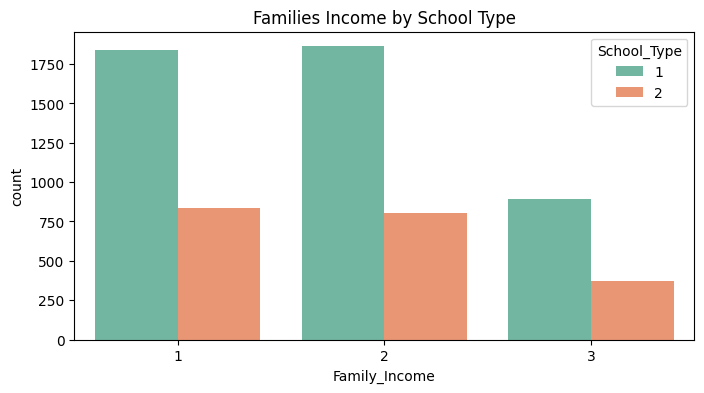

In [38]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Family_Income'], hue=df['School_Type'], palette='Set2')
plt.title('Families Income by School Type')
plt.show()

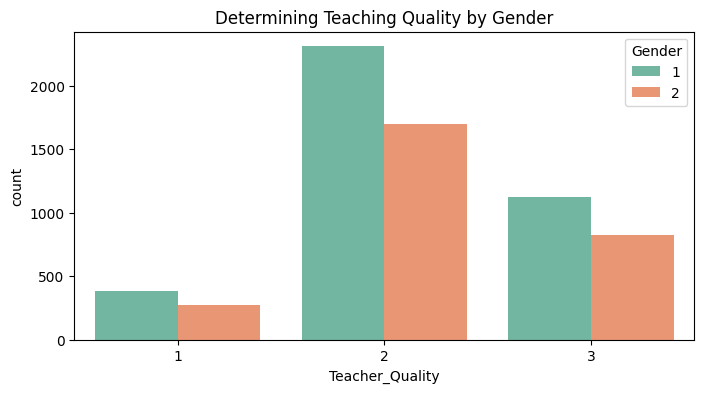

In [41]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Teacher_Quality'], hue=df['Gender'], palette='Set2')
plt.title('Determining Teaching Quality by Gender')
plt.show()

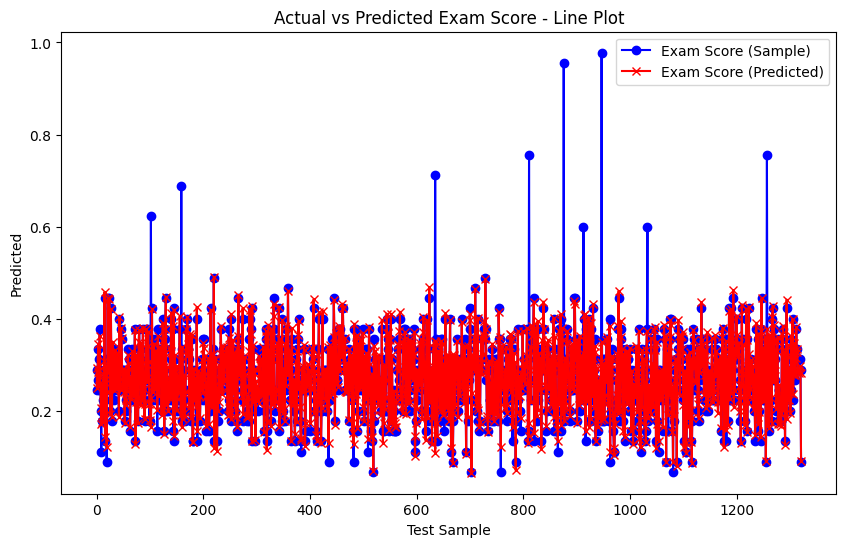

In [42]:
plt.figure(figsize=(10,6))
plt.plot(y_test, label="Exam Score (Sample)", color='blue', marker='o')
plt.plot(y_pred_lr, label="Exam Score (Predicted)", color='red', marker='x')
plt.title("Actual vs Predicted Exam Score - Line Plot")
plt.xlabel("Test Sample")
plt.ylabel("Predicted")
plt.legend()
plt.show()

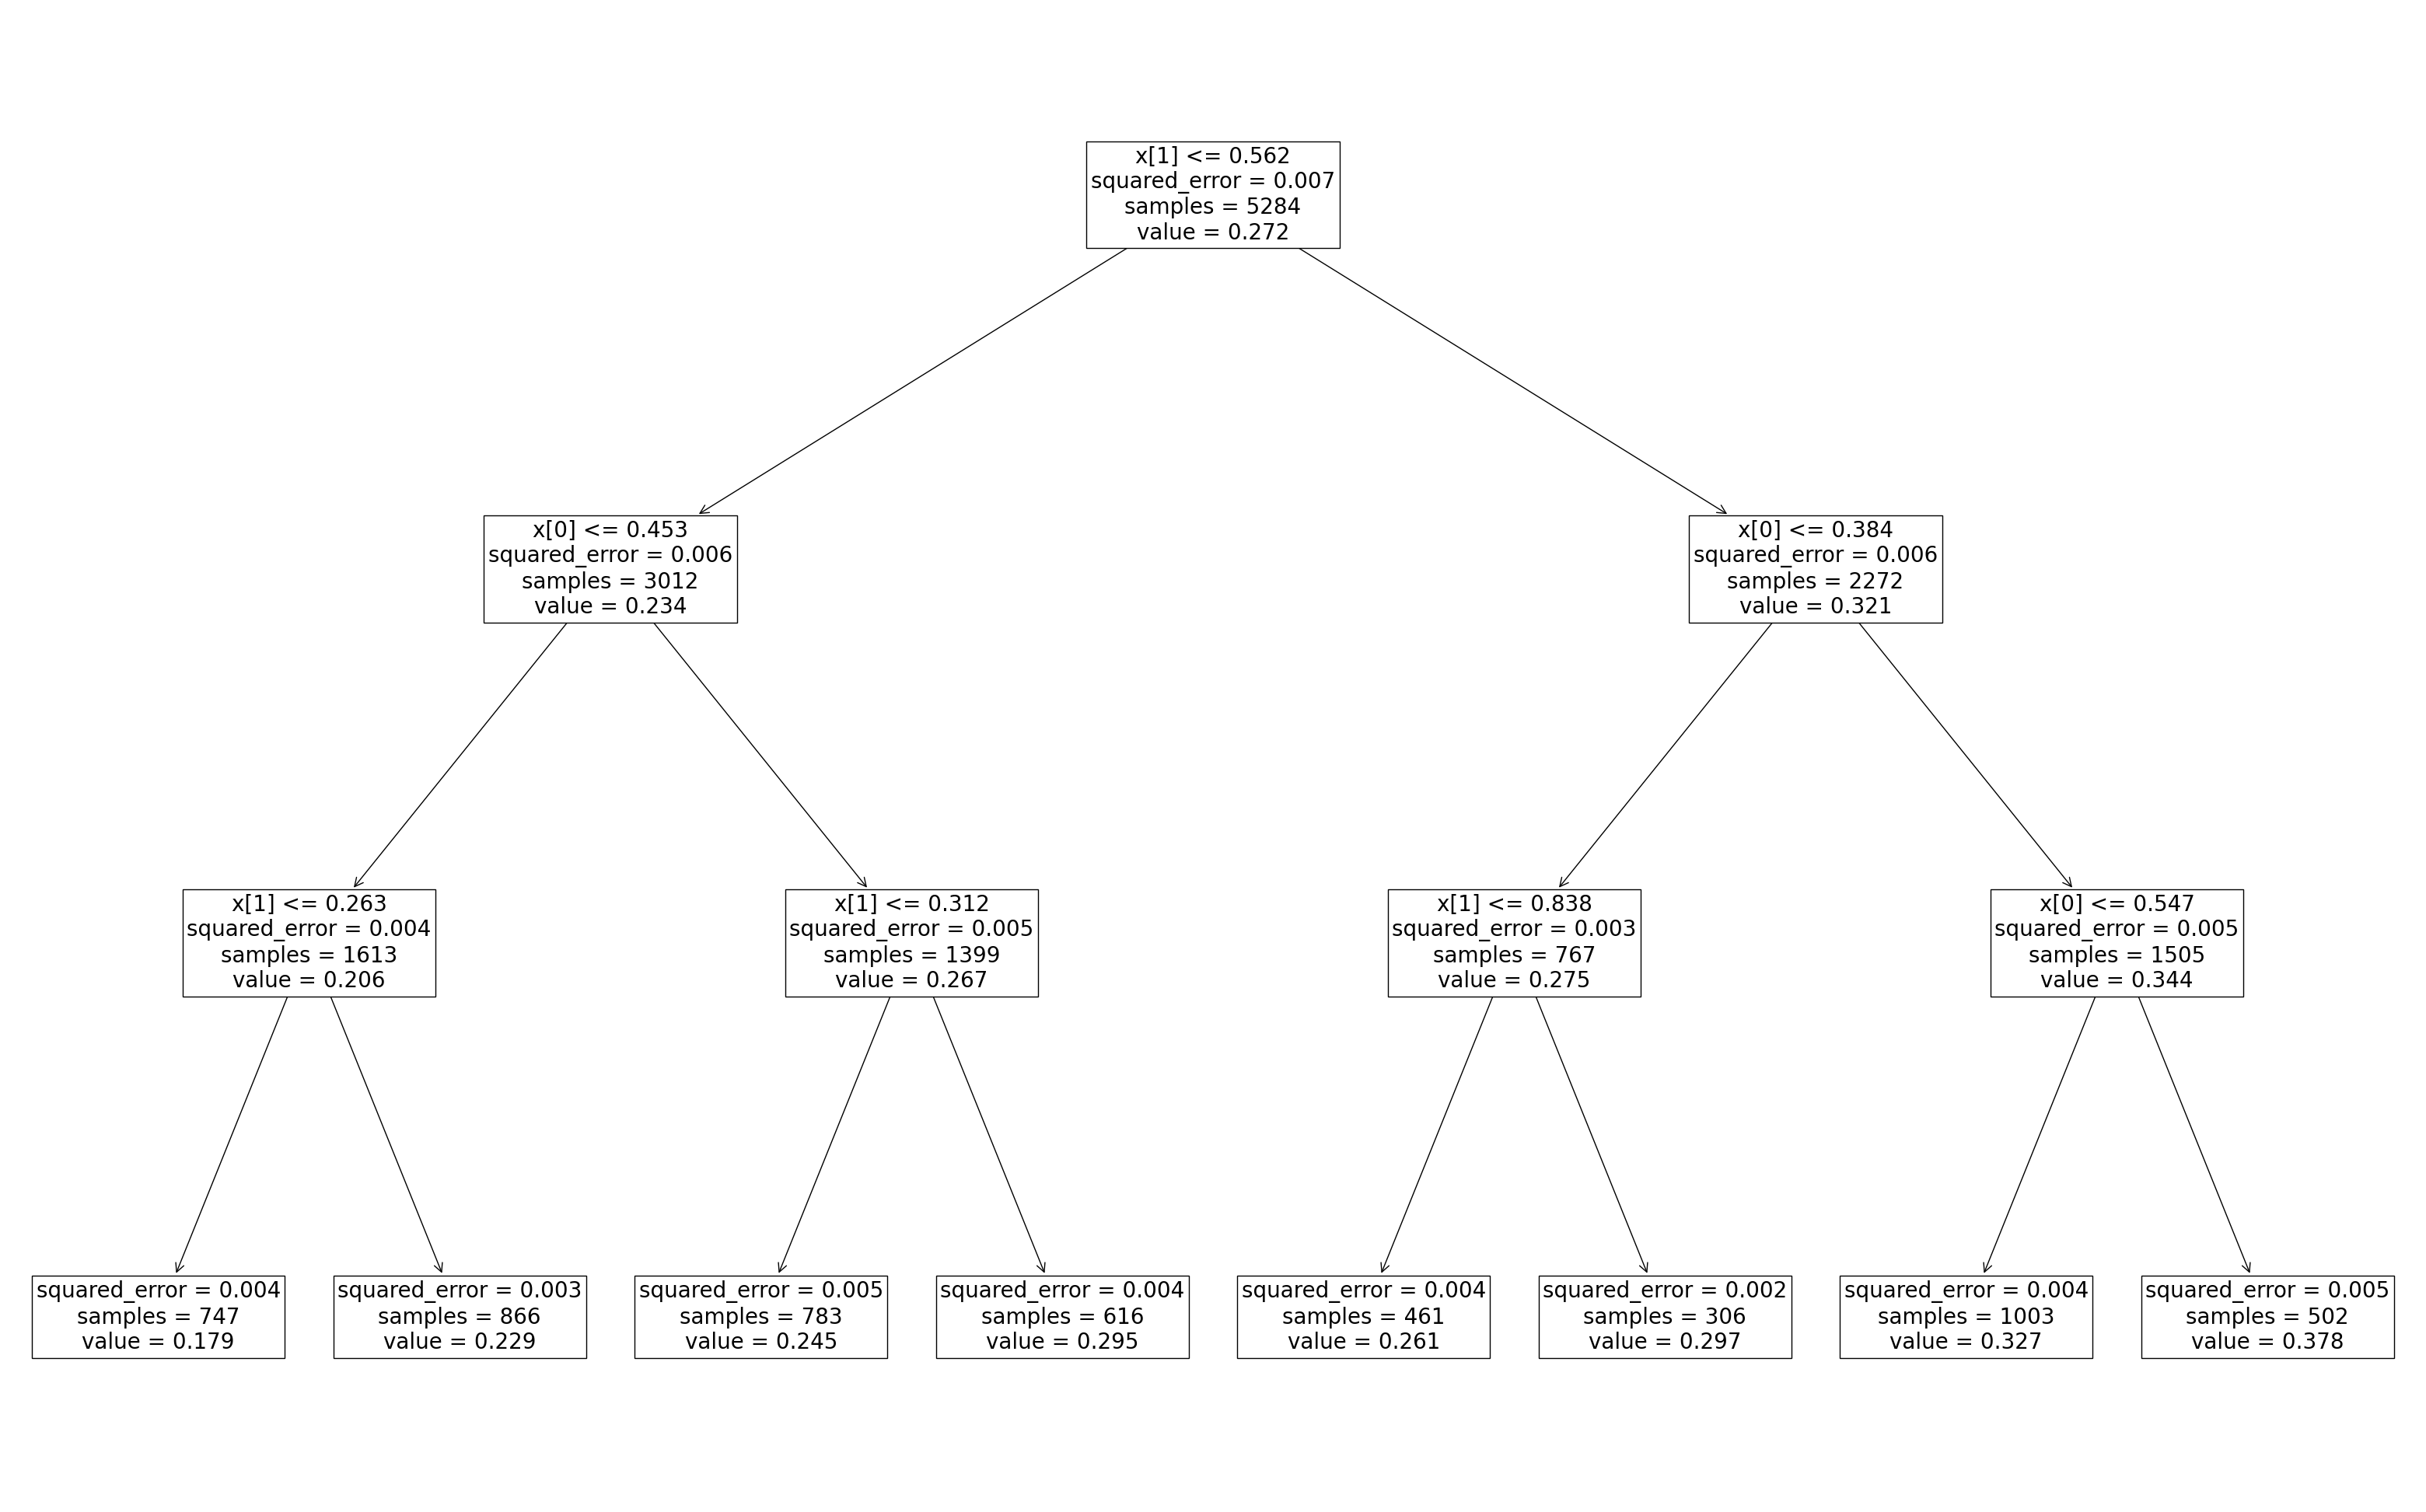

In [43]:
fig = plt.figure(figsize=(40,25))
_ = tree.plot_tree(dt_regressor,
                  fontsize=20)

In [44]:
from sklearn.metrics import r2_score

#Polynomial Regression Model Evaluation

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred_lr - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred_lr - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test, y_pred_lr))

Mean absolute error: 0.01
Residual sum of squares (MSE): 0.00
R2-score: 0.73


In [45]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred_dt - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred_dt - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test, y_pred_dt))

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.46
